원인 부분
- 유전 -> 유전자의 이상을 찾을 수 있는 경우는 전체 당뇨병의 1%미만에 불과
- 환경 -> 고령, 비만, 스트레스, 임신, 감염, 약물 등. 이는 유전적 요인과 다르게 노력으로 어느정도 피할 수 있음
- 최근 과식 및 운동량 감소로 비만증 증가 -> 당뇨병이 생길 위험성이 증가한다

진단 부분
- 경구포도당내용평가검사(OGTT)에서 2시간 후 혈장 포도당 200mg/dL일 경우 당뇨 진단

가설1 혈당이 높으면 당뇨일 가능성이 크다
- 귀무: 혈당이 140미만이면 당뇨가 아니다
- 대립: 혈당이 140이상이면 당뇨이다

가설2 비만이면 당뇨일 가능성이 크다
- 귀무: BMI가 30미만이면 당뇨가 아니다
- 대립: BMI가 30이상이면 당뇨이다

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

In [2]:
# 데이터 로드
df_origin= pd.read_csv('Diabetes.csv')
df_origin.shape

(768, 9)

In [3]:
# 결측치 없음
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

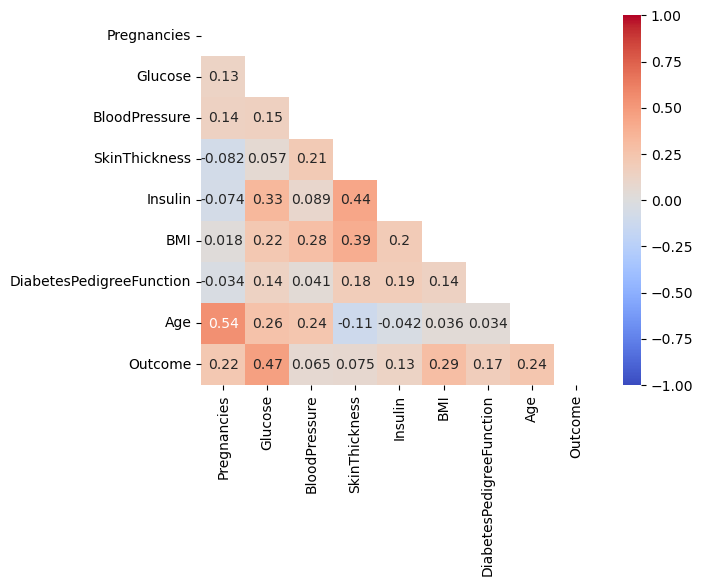

In [4]:
# 칼럼별 상관분석
df_origin_corr = df_origin.corr()

mask = np.triu(np.ones_like(df_origin_corr))
sns.heatmap(df_origin_corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1, mask=mask)


#### 상관관계 상위 5개 scatterplot시각화
- `나이` `임신` 0.54
- `나이` `혈당` 0.47
- `삼두근피부두께` `인슐린` 0.44
- `삼두근피부두께` `유전력` 0.39
- `혈당` `인슐린` 0.33


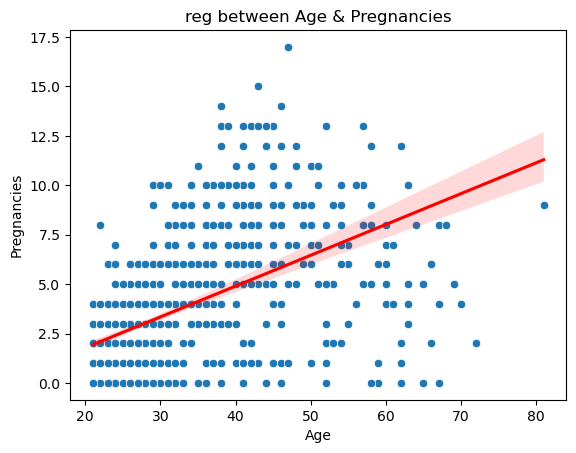

In [5]:
# `나이` - `임신` 0.54
sns.scatterplot(x='Age', y='Pregnancies', data=df_origin)
sns.regplot(x='Age', y='Pregnancies', data=df_origin, scatter=False, color='red')
plt.title('reg between Age & Pregnancies')

plt.show()

Text(0.5, 1.0, 'reg between Age & Glucose')

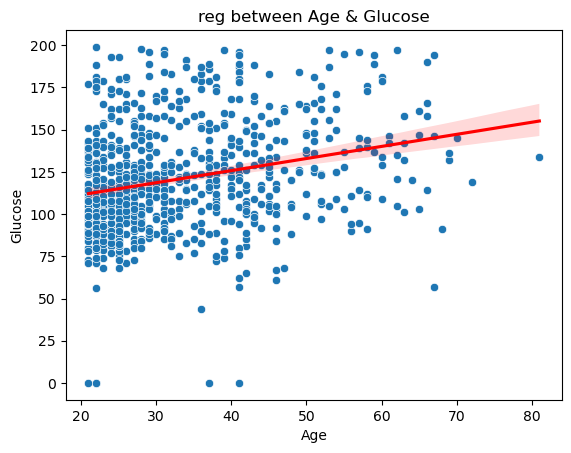

In [6]:
# `나이` - `혈당` 0.47
sns.scatterplot(x='Age', y='Glucose', data=df_origin)
sns.regplot(x='Age', y='Glucose', data=df_origin, scatter=False, color='red')
plt.title('reg between Age & Glucose')

Text(0.5, 1.0, 'reg between SkinThickness & Insulin')

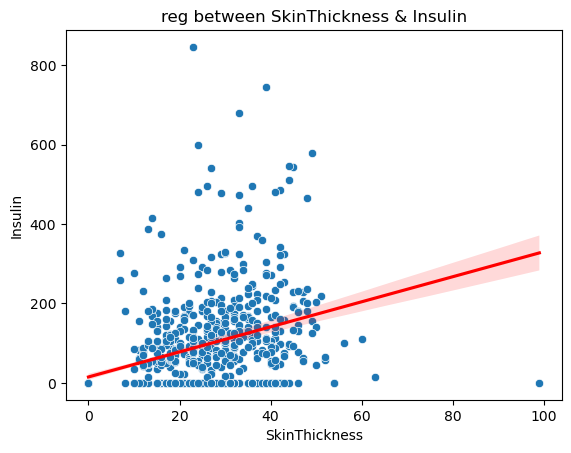

In [7]:
# `삼두근피부두께` - `인슐린` 0.44
sns.scatterplot(x='SkinThickness', y='Insulin', data=df_origin)
sns.regplot(x='SkinThickness', y='Insulin', data=df_origin, scatter=False, color='red')
plt.title('reg between SkinThickness & Insulin')

Text(0.5, 1.0, 'reg between SkinThickness & DiabetesPedigreeFunction')

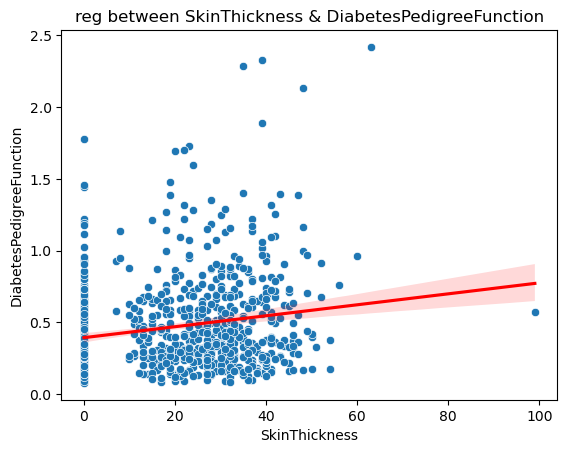

In [8]:
# `삼두근피부두께` - `유전력` 0.39
sns.scatterplot(x='SkinThickness', y='DiabetesPedigreeFunction', data=df_origin)
sns.regplot(x='SkinThickness', y='DiabetesPedigreeFunction', data=df_origin, scatter=False, color='red')
plt.title('reg between SkinThickness & DiabetesPedigreeFunction')

Text(0.5, 1.0, 'reg between Glucose & Insulin')

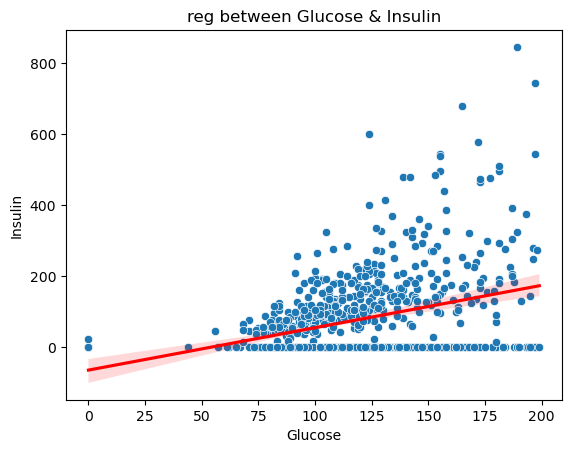

In [9]:
# `혈당` - `인슐린` 0.33
sns.scatterplot(x='Glucose', y='Insulin', data=df_origin)
sns.regplot(x='Glucose', y='Insulin', data=df_origin, scatter=False, color='red')
plt.title('reg between Glucose & Insulin')

---
## 당뇨 진단기준 중 하나 : `Glucose`가 200 이상이면 당뇨 판정

In [10]:
Glucose_200under_cnt = (df_origin['Glucose'] < 200).sum()
print(f'{Glucose_200under_cnt}명 \t Glucose 200 미만')

Glucose_200upper_cnt = (df_origin['Glucose'] >= 200).sum()
print(f'{Glucose_200upper_cnt}명 \t Glucose 200 이상')

# 진단기준(200mg/dL이상)을 넘는 사람은 없음

768명 	 Glucose 200 미만
0명 	 Glucose 200 이상


In [11]:
df_origin['Glucose'].describe()
# 상위 25% 인원을 위험군으로 정의

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

192명 	 Glucose 140.25이상(상위25%)


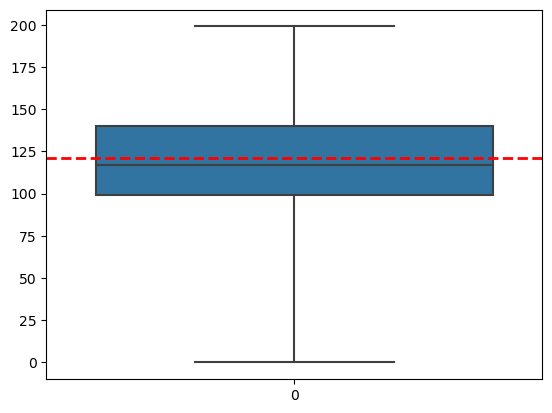

In [12]:
Glucose_140upper_cnt = (df_origin['Glucose'] >= 140.25).sum()
print(f'{Glucose_140upper_cnt}명 \t Glucose 140.25이상(상위25%)')

sns.boxplot(data=df_origin['Glucose'], whis=[0, 100])

Glucose_mean_value = df_origin['Glucose'].mean()
plt.axhline(Glucose_mean_value, color='r', linestyle='--', linewidth=2)

plt.show()

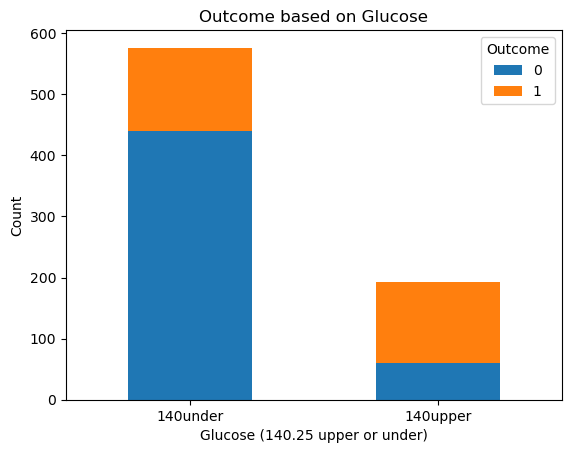

혈당 위험군의 당뇨 진단비율	: 68.75%
혈당 비위험군의 당뇨 진단비율	: 23.61%


In [13]:
grouped_data = df_origin.groupby(df_origin['Glucose'] >= 140.25)['Outcome'].value_counts().unstack()

grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Glucose (140.25 upper or under)')
plt.ylabel('Count')
plt.title('Outcome based on Glucose')
plt.xticks([0, 1], ['140under', '140upper'], rotation=0)
plt.legend(title='Outcome')
plt.show()

upper = ((df_origin['Glucose'] >= 140.25) & (df_origin['Outcome'] == 1)).sum() / (df_origin['Glucose'] >= 140.25).sum() *100
print(f'혈당 위험군의 당뇨 진단비율\t: {upper:.2f}%')

under = ((df_origin['Glucose'] < 140.25) & (df_origin['Outcome'] == 1)).sum() / (df_origin['Glucose'] < 140.25).sum() *100
print(f'혈당 비위험군의 당뇨 진단비율\t: {under:.2f}%')

---
## 비만 정도에 따른 분석

In [14]:
# BMI 수치에 따른 인원수
others_bmi = (df_origin['BMI'] < 20).sum()
print(f'{others_bmi}명 \t BMI 20 미만')

normal_bmi = ((df_origin['BMI'] < 25) & (df_origin['BMI'] >= 20)).sum()
print(f'{normal_bmi}명 \t 정상')

over_bmi = ((df_origin['BMI'] < 30) & (df_origin['BMI'] >= 25)).sum()
print(f'{over_bmi}명 \t 과체중(1도비만)')

obesity_bmi = ((df_origin['BMI'] < 40) & (df_origin['BMI'] >= 30)).sum()
print(f'{obesity_bmi}명 \t 비만(2도비만)')

severeOvesity_bmi = (df_origin['BMI'] >= 40).sum()
print(f'{severeOvesity_bmi}명 \t 고도비만')

24명 	 BMI 20 미만
93명 	 정상
179명 	 과체중(1도비만)
374명 	 비만(2도비만)
98명 	 고도비만


- BMI수치 30을 기준으로 일반/위험군 구분

In [15]:
df_BMI_good = df_origin[df_origin['BMI'] < 30]
df_BMI_danger = df_origin[df_origin['BMI'] >= 30]

---
# 결측치 보간

**평균값으로**
- 장점 : 쉽고 빠름, 범위가 넓지 않은 숫자형에 적합할 수 있음
- 단점 : 다른 feature 간의 상관관계가 고려되지 않음

**KNN Imputation**
- 모든 변수를 고려하여 k개의 가까운 데이터를 찾아 그 데이터와의 거리에 따라 가중평균
- 장점 : 다른 feature 간 관계 고려, 직관적
- 단점 : outlier에 민감, 파라미터 k를 찾아야 함, 범주형 사용불가

**MICE(multivariate imputation by chained equation)**
- 누락된 데이터를 연쇄방정식으로 여러번 채우는 방식. 



In [16]:
df_origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
(df_origin == 0).sum()
# 보간할 칼럼 = Glucose, BloodPressure, SkinThickness, Insulin, BMI

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

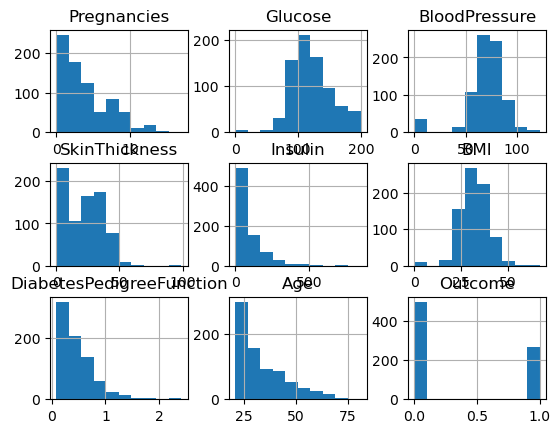

In [24]:
df_origin.hist()

In [74]:
# 결측치 보간을 위해 0을 결측치로 대치
# 보간할 칼럼 
# Glucose, BloodPressure, SkinThickness, Insulin, BMI
df_origin.loc[df_origin['Glucose'] == 0, 'Glucose'] = np.nan
df_origin.loc[df_origin['BloodPressure'] == 0, 'BloodPressure'] = np.nan
df_origin.loc[df_origin['SkinThickness'] == 0, 'SkinThickness'] = np.nan
df_origin.loc[df_origin['Insulin'] == 0, 'Insulin'] = np.nan
df_origin.loc[df_origin['BMI'] == 0, 'BMI'] = np.nan

In [47]:
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [86]:
# 1. 1차 선형보간법, interpolate
df_linear = df_origin.interpolate(method = 'linear')

# 2. 2차 선형보간법, interpolate
df_quadratic = df_origin.interpolate(method = 'quadratic')

# 3. 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df_origin) #sklearn 제공하는 simpleimputer로 평균대치
df_mean = pd.DataFrame(df_mean)

# 4. 0값으로 대체 
df_zero = df_origin.fillna(0)

# 5. KNN 방법
imputer_knn = KNNImputer(n_neighbors=3)
df_knn = imputer_knn.fit_transform(df_origin)
df_knn = pd.DataFrame(df_knn)

# 6. MICE 다중대치법
mice_imputer = IterativeImputer() # 베이지안회귀로 결측치를 대체 
df_mice = mice_imputer.fit_transform(df_origin)
df_mice = pd.DataFrame(df_mice)

In [87]:
# 칼럼명 설정
new_columns = ['Pregnancies', 'Glucose', 'BloodPressure',
               'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
               'Age', 'Outcome']
df_mean.columns = new_columns
df_knn.columns = new_columns
df_mice.columns = new_columns

Text(0.5, 1.0, 'Mice Glucose')

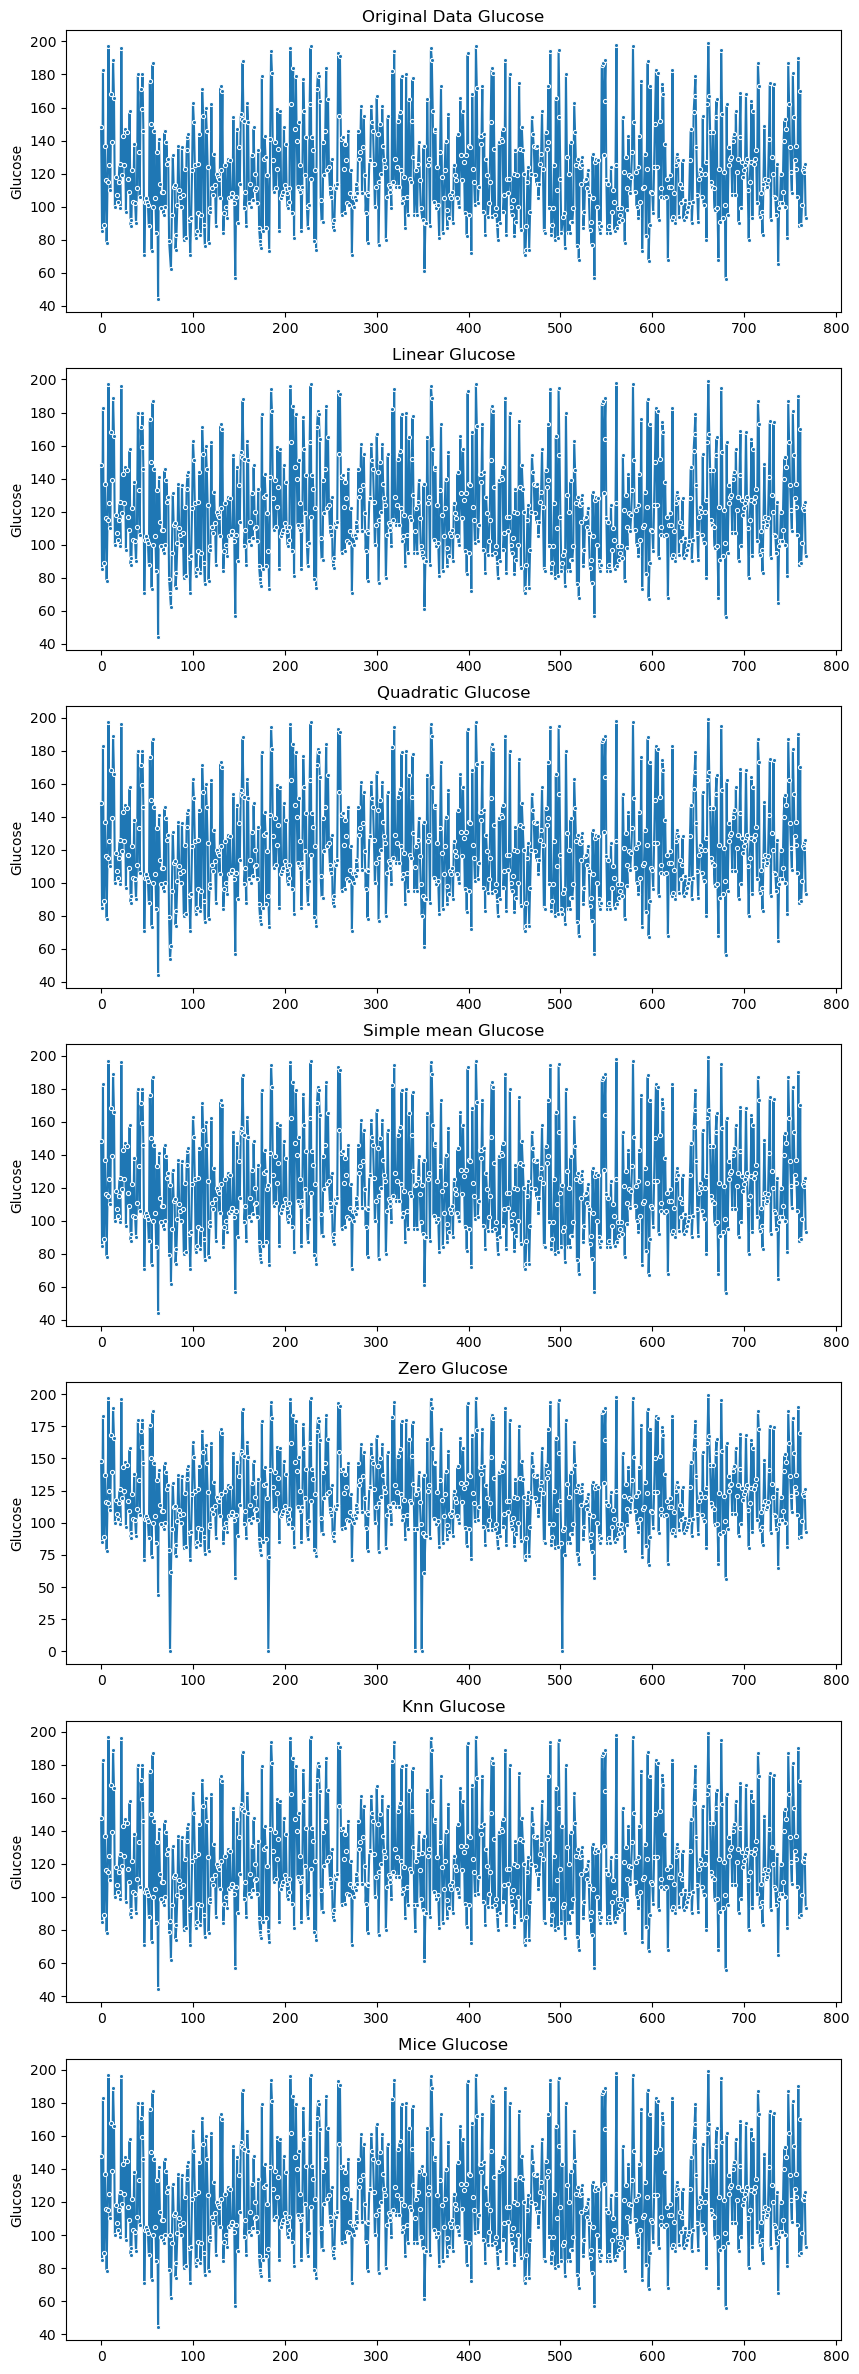

In [92]:
# Glucose 보간 후 시각화
fig, axs = plt.subplots(7,1,figsize=(10,30))

sns.lineplot(data= df_origin['Glucose'], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data Glucose')
sns.lineplot(data= df_linear['Glucose'], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear Glucose')
sns.lineplot(data= df_quadratic['Glucose'], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Glucose')
sns.lineplot(data= df_mean['Glucose'], marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple mean Glucose')
sns.lineplot(data= df_zero['Glucose'], marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero Glucose')
sns.lineplot(data= df_knn['Glucose'], marker='.', ax=axs[5], legend='auto')
axs[5].set_title('Knn Glucose')
sns.lineplot(data= df_mice['Glucose'], marker='.', ax=axs[6], legend='auto')
axs[6].set_title('Mice Glucose')

Text(0.5, 1.0, 'Mice BloodPressure')

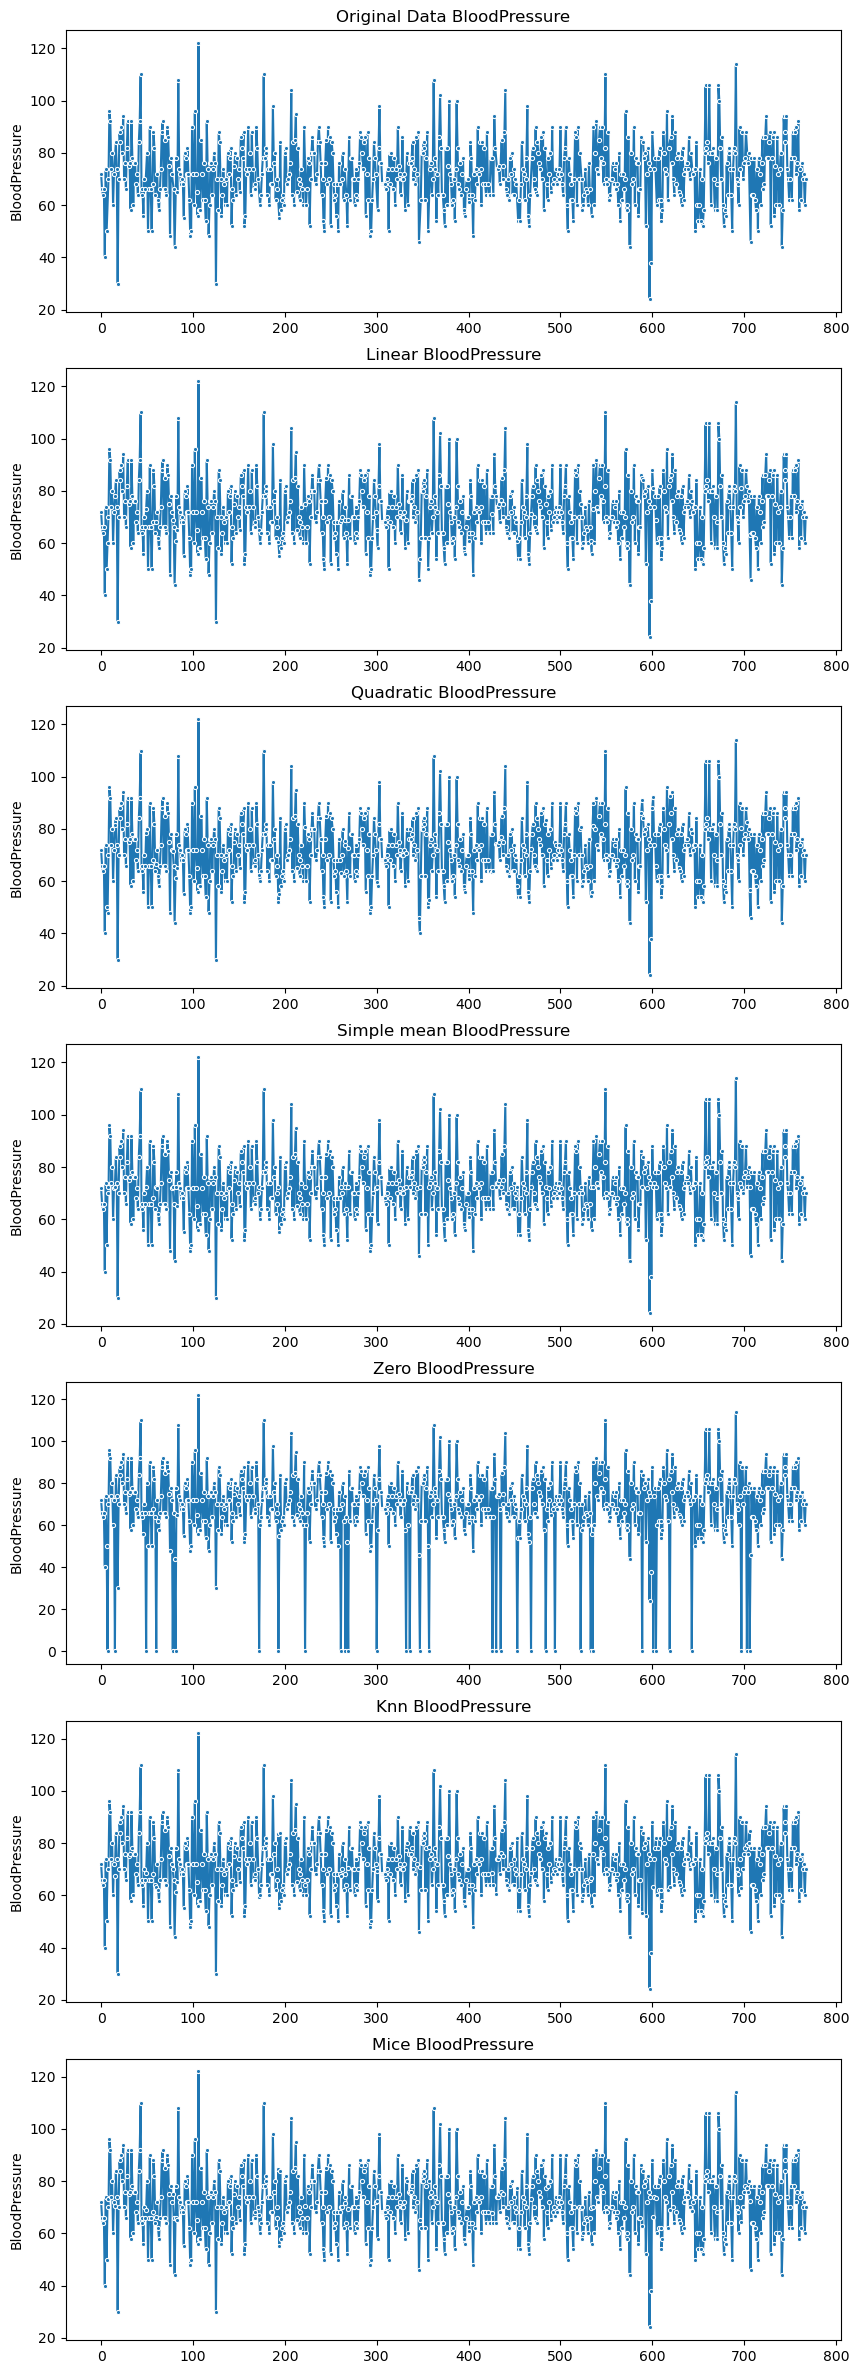

In [94]:
# BloodPressure 보간 후 시각화
fig, axs = plt.subplots(7,1,figsize=(10,30))

sns.lineplot(data= df_origin['BloodPressure'], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data BloodPressure')
sns.lineplot(data= df_linear['BloodPressure'], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear BloodPressure')
sns.lineplot(data= df_quadratic['BloodPressure'], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic BloodPressure')
sns.lineplot(data= df_mean['BloodPressure'], marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple mean BloodPressure')
sns.lineplot(data= df_zero['BloodPressure'], marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero BloodPressure')
sns.lineplot(data= df_knn['BloodPressure'], marker='.', ax=axs[5], legend='auto')
axs[5].set_title('Knn BloodPressure')
sns.lineplot(data= df_mice['BloodPressure'], marker='.', ax=axs[6], legend='auto')
axs[6].set_title('Mice BloodPressure')

Text(0.5, 1.0, 'Mice SkinThickness')

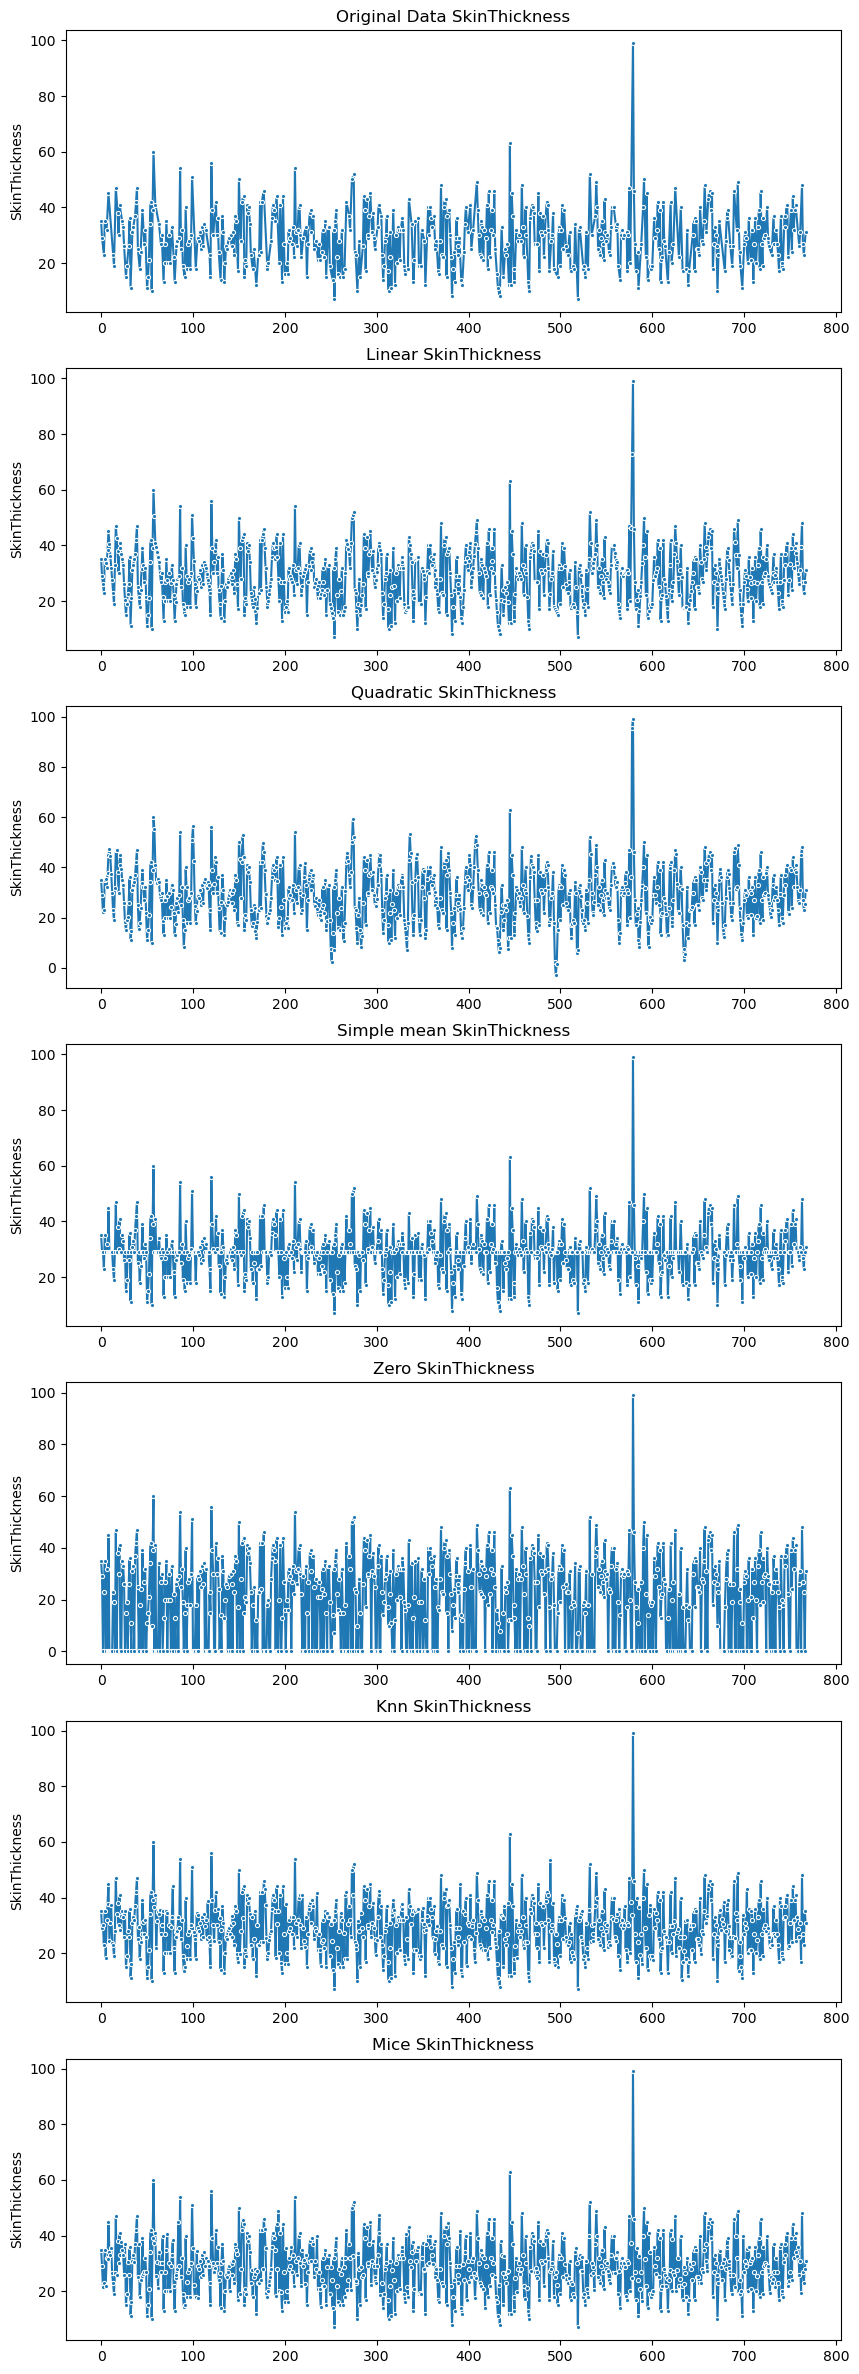

In [98]:
# SkinThickness 보간 후 시각화
fig, axs = plt.subplots(7,1,figsize=(10,30))

sns.lineplot(data= df_origin['SkinThickness'], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data SkinThickness')
sns.lineplot(data= df_linear['SkinThickness'], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear SkinThickness')
sns.lineplot(data= df_quadratic['SkinThickness'], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic SkinThickness')
sns.lineplot(data= df_mean['SkinThickness'], marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple mean SkinThickness')
sns.lineplot(data= df_zero['SkinThickness'], marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero SkinThickness')
sns.lineplot(data= df_knn['SkinThickness'], marker='.', ax=axs[5], legend='auto')
axs[5].set_title('Knn SkinThickness')
sns.lineplot(data= df_mice['SkinThickness'], marker='.', ax=axs[6], legend='auto')
axs[6].set_title('Mice SkinThickness')

Text(0.5, 1.0, 'Mice Insulin')

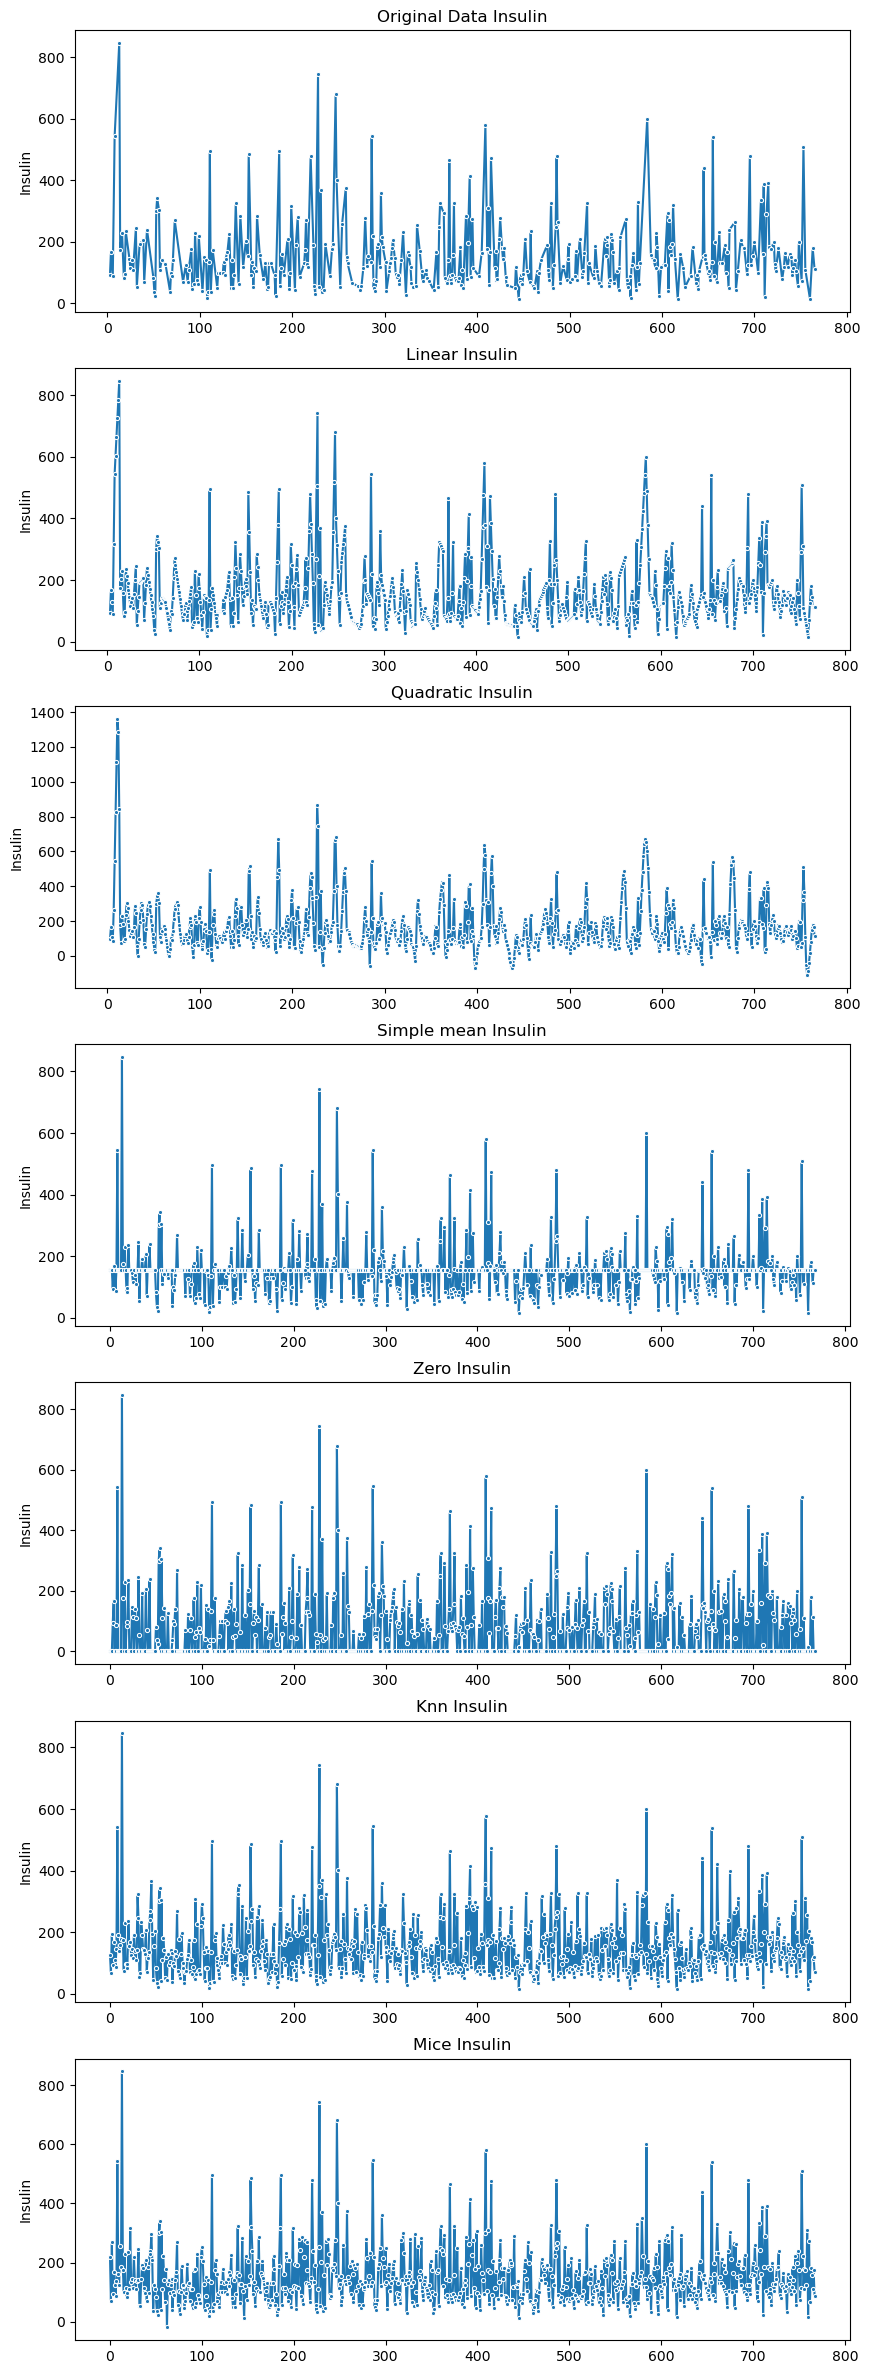

In [99]:
# Insulin 보간 후 시각화
fig, axs = plt.subplots(7,1,figsize=(10,30))

sns.lineplot(data= df_origin['Insulin'], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data Insulin')
sns.lineplot(data= df_linear['Insulin'], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear Insulin')
sns.lineplot(data= df_quadratic['Insulin'], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Insulin')
sns.lineplot(data= df_mean['Insulin'], marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple mean Insulin')
sns.lineplot(data= df_zero['Insulin'], marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero Insulin')
sns.lineplot(data= df_knn['Insulin'], marker='.', ax=axs[5], legend='auto')
axs[5].set_title('Knn Insulin')
sns.lineplot(data= df_mice['Insulin'], marker='.', ax=axs[6], legend='auto')
axs[6].set_title('Mice Insulin')

Text(0.5, 1.0, 'Mice BMI')

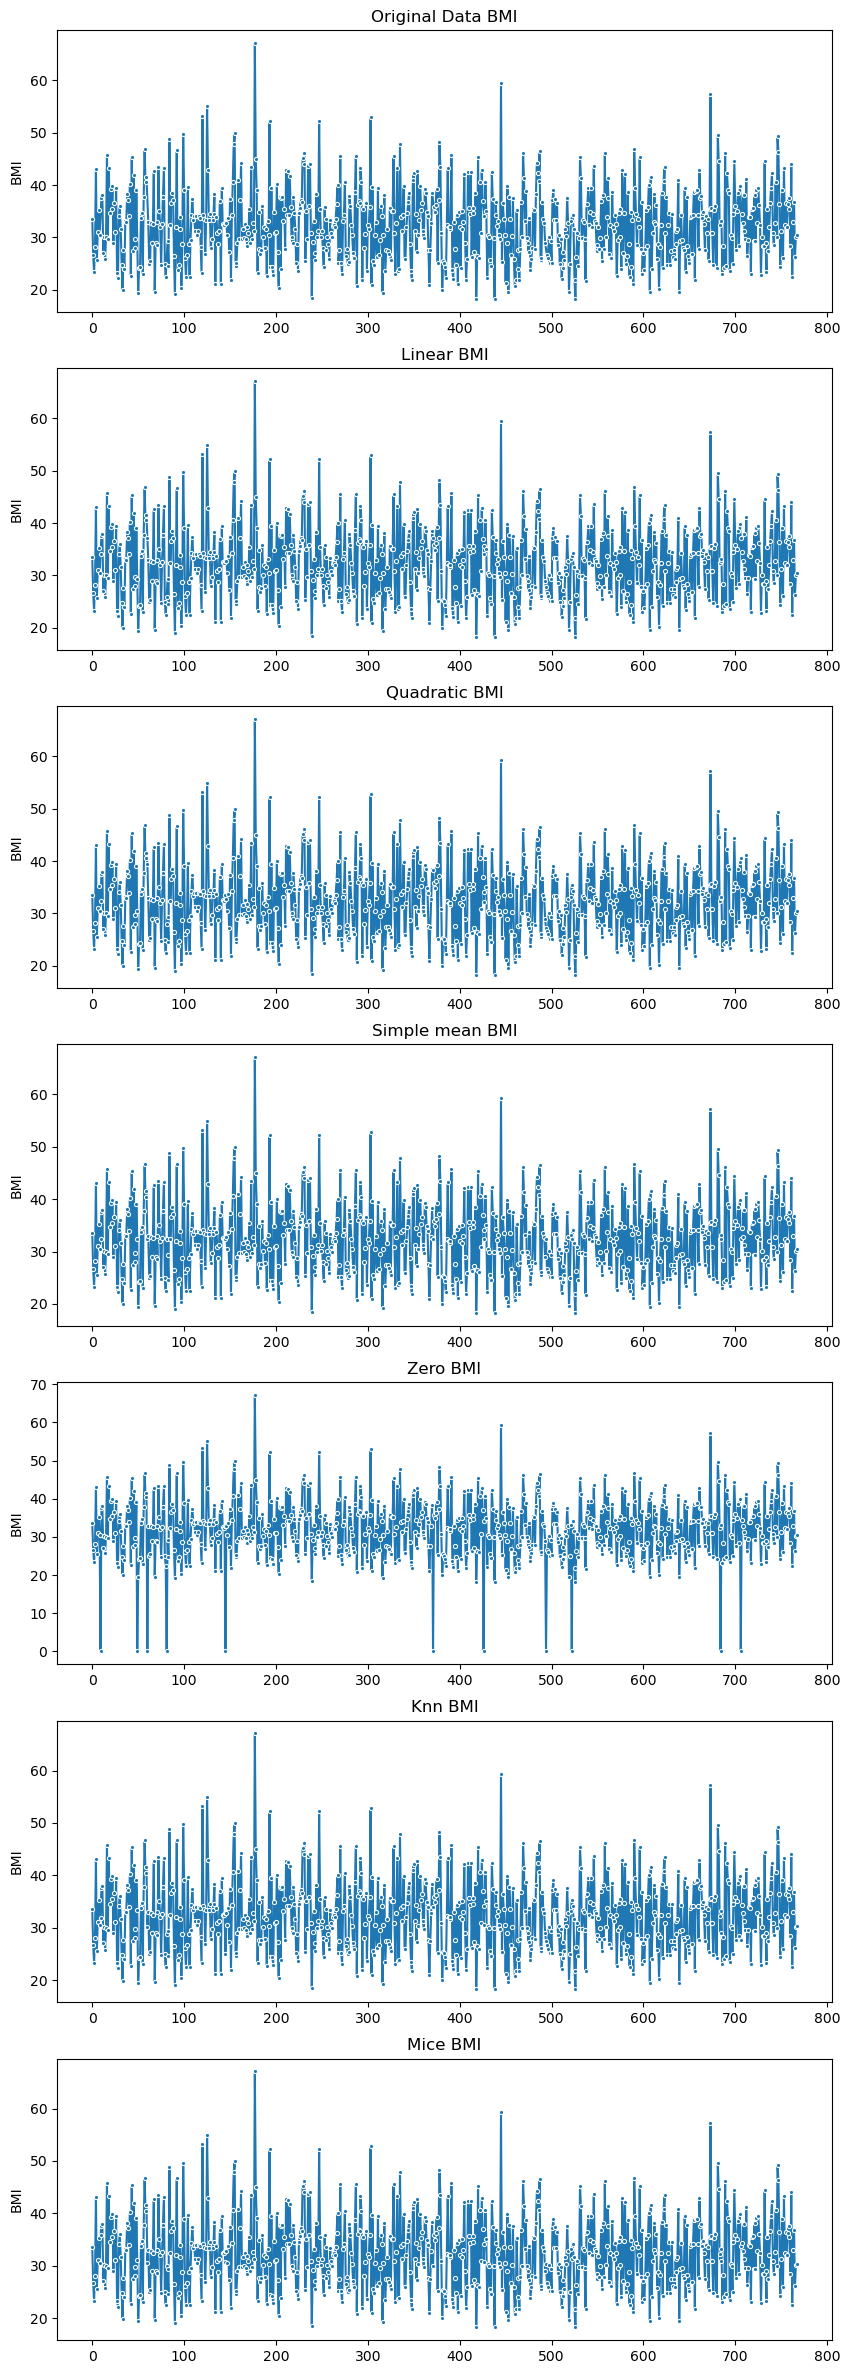

In [100]:
, # BMI 보간 후 시각화
fig, axs = plt.subplots(7,1,figsize=(10,30))

sns.lineplot(data= df_origin['BMI'], marker='.', ax=axs[0], legend='auto')
axs[0].set_title('Original Data BMI')
sns.lineplot(data= df_linear['BMI'], marker='.', ax=axs[1], legend='auto')
axs[1].set_title('Linear BMI')
sns.lineplot(data= df_quadratic['BMI'], marker='.', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic BMI')
sns.lineplot(data= df_mean['BMI'], marker='.', ax=axs[3], legend='auto')
axs[3].set_title('Simple mean BMI')
sns.lineplot(data= df_zero['BMI'], marker='.', ax=axs[4], legend='auto')
axs[4].set_title('Zero BMI')
sns.lineplot(data= df_knn['BMI'], marker='.', ax=axs[5], legend='auto')
axs[5].set_title('Knn BMI')
sns.lineplot(data= df_mice['BMI'], marker='.', ax=axs[6], legend='auto')
axs[6].set_title('Mice BMI')

---
#### 기술통계 비교
- Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [131]:
def summarize_column_stats(df_list, column_name, column_names):
    df_desc_list = []
    for df, col_name in zip(df_list, column_names):
        desc = df[column_name].describe().round(2)
        df_desc_list.append(desc)
    
    df_summary = pd.concat(df_desc_list, axis=1)
    
    df_summary.columns = [f'{col}_{column_name}' for col in column_names]
    
    return df_summary

# 각 데이터프레임에 대한 칼럼명 리스트
column_names = ['origin', 'quadratic', 'linear', 'mean', 'zero', 'knn', 'mice']

In [133]:
summarize_column_stats([df_origin, df_quadratic, df_linear, df_mean, df_zero, df_knn, df_mice],
                       'Insulin', column_names)

,origin_Insulin,quadratic_Insulin,linear_Insulin,mean_Insulin,zero_Insulin,knn_Insulin,mice_Insulin
count,394.00,763.00,765.00,768.00,768.00,768.00,768.00
mean,155.55,166.98,159.05,155.55,79.80,153.41,152.68
std,118.78,151.71,111.60,85.02,115.24,100.85,97.38
min,14.00,-111.58,14.00,14.00,0.00,14.00,-19.50
25%,76.25,76.00,88.00,121.50,0.00,83.00,90.00
50%,125.00,130.00,130.00,155.55,30.50,132.00,130.13
75%,190.00,204.50,190.50,155.55,127.25,191.00,190.00
max,846.00,1359.08,846.00,846.00,846.00,846.00,846.00


In [134]:
summarize_column_stats([df_origin, df_quadratic, df_linear, df_mean, df_zero, df_knn, df_mice],
                       'BloodPressure', column_names)

,origin_BloodPressure,quadratic_BloodPressure,linear_BloodPressure,mean_BloodPressure,zero_BloodPressure,knn_BloodPressure,mice_BloodPressure
count,733.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,72.41,72.33,72.33,72.41,69.11,72.34,72.35
std,12.38,12.40,12.21,12.10,19.36,12.22,12.15
min,24.00,24.00,24.00,24.00,0.00,24.00,24.00
25%,64.00,64.00,64.00,64.00,62.00,64.00,64.00
50%,72.00,72.00,72.00,72.20,72.00,72.00,72.00
75%,80.00,80.00,80.00,80.00,80.00,80.00,80.00
max,122.00,122.00,122.00,122.00,122.00,122.00,122.00


In [136]:
summarize_column_stats([df_origin, df_quadratic, df_linear, df_mean, df_zero, df_knn, df_mice],
                       'SkinThickness', column_names)

,origin_SkinThickness,quadratic_SkinThickness,linear_SkinThickness,mean_SkinThickness,zero_SkinThickness,knn_SkinThickness,mice_SkinThickness
count,541.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,29.15,28.94,29.08,29.15,20.54,29.10,28.91
std,10.48,11.16,9.89,8.79,15.95,9.58,9.52
min,7.00,-2.95,7.00,7.00,0.00,7.00,7.00
25%,22.00,21.00,22.00,25.00,0.00,22.33,22.11
50%,29.00,29.00,29.00,29.15,23.00,29.00,28.48
75%,36.00,36.00,36.00,32.00,32.00,35.00,35.00
max,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [143]:
summarize_column_stats([df_origin, df_quadratic, df_linear, df_mean, df_zero, df_knn, df_mice],
                       'Insulin', column_names)

,origin_Insulin,quadratic_Insulin,linear_Insulin,mean_Insulin,zero_Insulin,knn_Insulin,mice_Insulin
count,394.00,763.00,765.00,768.00,768.00,768.00,768.00
mean,155.55,166.98,159.05,155.55,79.80,153.41,152.68
std,118.78,151.71,111.60,85.02,115.24,100.85,97.38
min,14.00,-111.58,14.00,14.00,0.00,14.00,-19.50
25%,76.25,76.00,88.00,121.50,0.00,83.00,90.00
50%,125.00,130.00,130.00,155.55,30.50,132.00,130.13
75%,190.00,204.50,190.50,155.55,127.25,191.00,190.00
max,846.00,1359.08,846.00,846.00,846.00,846.00,846.00


In [138]:
summarize_column_stats([df_origin, df_quadratic, df_linear, df_mean, df_zero, df_knn, df_mice],
                       'BMI', column_names)

,origin_BMI,quadratic_BMI,linear_BMI,mean_BMI,zero_BMI,knn_BMI,mice_BMI
count,757.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,32.46,32.47,32.47,32.46,31.99,32.43,32.44
std,6.92,6.89,6.89,6.88,7.88,6.89,6.88
min,18.20,18.20,18.20,18.20,0.00,18.20,18.20
25%,27.50,27.50,27.50,27.50,27.30,27.50,27.50
50%,32.30,32.35,32.40,32.40,32.00,32.15,32.05
75%,36.60,36.60,36.60,36.60,36.60,36.60,36.60
max,67.10,67.10,67.10,67.10,67.10,67.10,67.10


---
#### 상관관계

In [140]:
df_zero.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [139]:
df_mice.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130868,0.213643,0.107254,0.070628,0.024170,-0.033523,0.544341,0.221898
Glucose,0.130868,1.000000,0.230901,0.244077,0.699755,0.236731,0.138932,0.269671,0.496507
BloodPressure,0.213643,0.230901,1.000000,0.242911,0.139758,0.296615,0.003154,0.334848,0.174864
SkinThickness,0.107254,0.244077,0.242911,1.000000,0.251596,0.706192,0.122078,0.152018,0.279509
Insulin,0.070628,0.699755,0.139758,0.251596,1.000000,0.275203,0.135871,0.215502,0.361085
BMI,0.024170,0.236731,0.296615,0.706192,0.275203,1.000000,0.152237,0.028332,0.315248
DiabetesPedigreeFunction,-0.033523,0.138932,0.003154,0.122078,0.135871,0.152237,1.000000,0.033561,0.173844
Age,0.544341,0.269671,0.334848,0.152018,0.215502,0.028332,0.033561,1.000000,0.238356
Outcome,0.221898,0.496507,0.174864,0.279509,0.361085,0.315248,0.173844,0.238356,1.000000


In [141]:
df_quadratic.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129338,0.185185,0.072548,0.128483,0.022867,-0.033523,0.544341,0.221898
Glucose,0.129338,1.000000,0.212816,0.174724,0.292182,0.229762,0.139227,0.267725,0.488460
BloodPressure,0.185185,0.212816,1.000000,0.160373,0.034112,0.265504,-0.005969,0.310815,0.159635
SkinThickness,0.072548,0.174724,0.160373,1.000000,0.161603,0.446909,0.106337,0.105841,0.178646
Insulin,0.128483,0.292182,0.034112,0.161603,1.000000,0.118954,0.087310,0.151337,0.158247
BMI,0.022867,0.229762,0.265504,0.446909,0.118954,1.000000,0.157244,0.024234,0.312353
DiabetesPedigreeFunction,-0.033523,0.139227,-0.005969,0.106337,0.087310,0.157244,1.000000,0.033561,0.173844
Age,0.544341,0.267725,0.310815,0.105841,0.151337,0.024234,0.033561,1.000000,0.238356
Outcome,0.221898,0.488460,0.159635,0.178646,0.158247,0.312353,0.173844,0.238356,1.000000
